In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.stats import norm

def sigmoid(t):
    return 1 / (1 + np.exp(-t))

def epsilon(t):
    return norm.cdf(t) - sigmoid(np.sqrt(8 / np.pi) * t)

def neg_abs_epsilon(t):
    return -np.abs(epsilon(t))

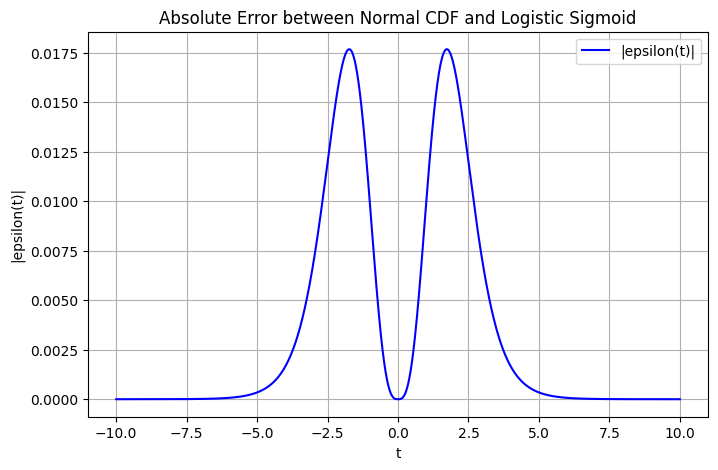

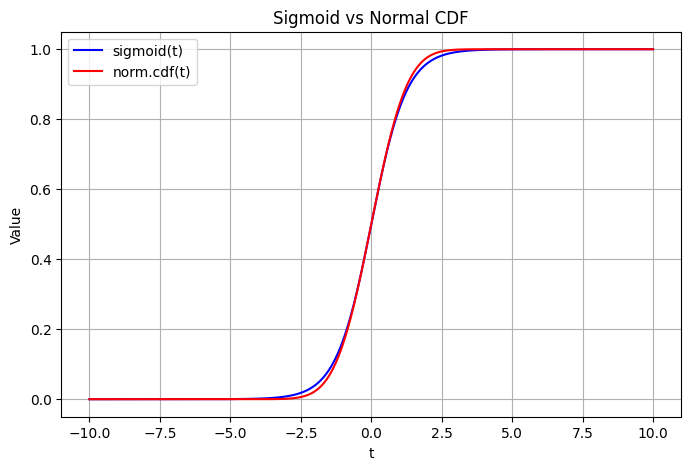

In [2]:

# Generate values of t
t_vals = np.linspace(-10, 10, 5000)
sig_vals = sigmoid(np.sqrt(8 / np.pi) * t_vals)
norm_vals = norm.cdf(t_vals)
err_vals = np.abs(epsilon(t_vals))

# Plot abs(epsilon)
plt.figure(figsize=(8, 5))
plt.plot(t_vals, err_vals, label='|epsilon(t)|', color='b')
plt.xlabel('t')
plt.ylabel('|epsilon(t)|')
plt.title('Absolute Error between Normal CDF and Logistic Sigmoid')
plt.legend()
plt.grid()
plt.show()

# plot norm vs sig
plt.figure(figsize=(8, 5))
plt.plot(t_vals, sig_vals, label='sigmoid(t)', color='b')
plt.plot(t_vals, norm_vals, label='norm.cdf(t)', color='r')
plt.xlabel('t')
plt.ylabel('Value')
plt.title('Sigmoid vs Normal CDF')
plt.legend()
plt.grid()
plt.show()

In [4]:

# Grid search for a good initial guess
t_vals = np.linspace(-5, 5, 1000)
err_vals = np.abs(epsilon(t_vals))
t_init = t_vals[np.argmax(err_vals)]

# Refine with numerical optimization
res = opt.minimize_scalar(neg_abs_epsilon, bounds=(-10, 10), method='bounded')

# Compute supremum norm
sup_norm = -res.fun  # Since we minimized the negative
print(f"Supremum norm ||epsilon||_∞ ≈ {sup_norm:.6f}")

# t where supremum occurs
t_supremum = res.x
print(f"t where supremum occurs: {t_supremum:.6f}")

Supremum norm ||epsilon||_∞ ≈ 0.017671
t where supremum occurs: 1.731830
